Imports

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



Prepare DATASET

In [3]:

train = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test",
                                          target_size=(32,32),
                                          batch_size = 1,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test",
                                          target_size=(32,32),
                                          batch_size = 1,
                                          class_mode = 'binary')                                    
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/train",
                                          target_size=(32,32),
                                          batch_size =1,
                                          class_mode = 'binary')

test_dataset.class_indices

Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


{'SNGAN_bicubic': 0, 'imagewoof': 1}

Design Model

In [3]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-13 20:12:00.321255: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-13 20:12:00.321413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Training

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [4]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(train_dataset,
         steps_per_epoch = 80,
         epochs = 100,
         callbacks=[early_stopping],
         validation_data = validation_dataset
         )

Epoch 1/100


2022-05-13 20:12:00.435742: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 9/80 [==>...........................] - ETA: 0s - loss: 1.1521 - accuracy: 0.5556     

2022-05-13 20:12:00.711547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


73/80 [==========================>...] - ETA: 0s - loss: 0.7584 - accuracy: 0.4658

2022-05-13 20:12:01.421112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 2s 21ms/step - loss: 0.7521 - accuracy: 0.4625 - val_loss: 0.6881 - val_accuracy: 0.7000
Epoch 2/100
80/80 [==============================] - 2s 21ms/step - loss: 0.6991 - accuracy: 0.6000 - val_loss: 0.6787 - val_accuracy: 0.7150
Epoch 3/100
80/80 [==============================] - 2s 21ms/step - loss: 0.7022 - accuracy: 0.5125 - val_loss: 0.6784 - val_accuracy: 0.5000
Epoch 4/100
80/80 [==============================] - 2s 21ms/step - loss: 0.6939 - accuracy: 0.6250 - val_loss: 0.6401 - val_accuracy: 0.5475
Epoch 5/100
80/80 [==============================] - 2s 21ms/step - loss: 0.6166 - accuracy: 0.6375 - val_loss: 0.5758 - val_accuracy: 0.7275
Epoch 6/100
80/80 [==============================] - 2s 21ms/step - loss: 0.6429 - accuracy: 0.6625 - val_loss: 0.5097 - val_accuracy: 0.7850
Epoch 7/100
80/80 [==============================] - 2s 22ms/step - loss: 0.5327 - accuracy: 0.7125 - val_loss: 0.5057 - val_accuracy: 0.7450
Epoch 8/100
80/80 

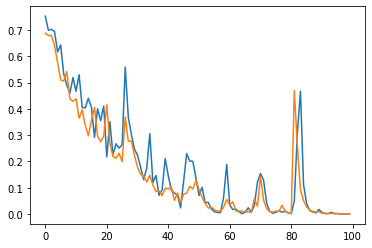

In [6]:
# visualizing losses and accuracy
# print(history.history)
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(100)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)

In [7]:
_, acc = model.evaluate(test_dataset)
print(acc *100)

1600/1600 [==============================] - 5s 3ms/step - loss: 1.2040 - accuracy: 0.7856
78.56249809265137


Prediction

[[1.]]


2022-05-13 20:15:39.515514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


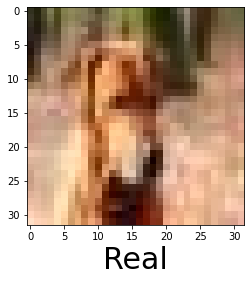

In [8]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/imagewoof_test/985.jpg")


[[1.]]


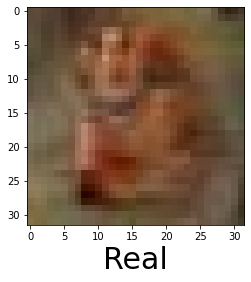

In [9]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/SNGAN_bicubic_test/954.jpg")